# Introduction

In the era of rapidly advancing natural language processing and artificial intelligence, technologies like chatGPT are transforming industries across the globe. This project takes a deep dive into the landscape of companies driving this transformation and those poised to be affected by it. We explore a curated selection of stocks with the potential to thrive in the age of chatGPT and other groundbreaking natural language processing innovations.

Our analysis leverages the power of pandas to dissect crucial data, including vital metrics such as value, risk, and returns. We focus on major tech players who are making significant shifts towards AI, including:
1. Nvidia
2. Google
3. Microsoft
4. Amazon

Within this notebook, we aim to uncover answers to compelling questions, shedding light on the dynamics of these tech giants and their potential in the AI-driven landscape:
- How has the stock price of these companies evolved over time?
- What insights can we gain from examining moving averages of their stock prices?
- What do daily returns reveal about individual stock performance, and how are these returns correlated across different companies?
- What level of risk is associated with each investment, and how can we quantify it?

## Import Libraries

In [1]:
from __future__ import division
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualisation modules imports
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

from datetime import datetime

# Using yfinance to access Yahoo Historical Stocks
import yfinance as yf

## Fetch Stock Data

We will analyze and compare the performance of the four stocks over the period from January 2022 to October 2023. To provide context for their performance in the broader tech sector, we will also obtain historical price data for S&P 500 and the NASDAQ 100, both of which are key market benchmark indexes.

In [2]:
# Global variables
stock_list = ['MSFT', 'NVDA', 'GOOGL', 'AMZN', 'QQQ', 'SPY']

# Format date: Y-M-D
start = datetime(2022, 1, 1)
end = datetime(2023, 10, 10)

for stock in stock_list:
    stock_data = yf.download(stock, start, end)
    stock_data['Daily Return %'] = round(stock_data['Adj Close'].pct_change() * 100, 2)
    globals()[stock] = stock_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
dataframes = [MSFT, NVDA, GOOGL, AMZN, QQQ, SPY]

# Verify that there are should be only 1 missing value in our dataframes
for df, stock in zip(dataframes, stock_list):
    print(stock + ':', df.isnull().sum().sum())

MSFT: 1
NVDA: 1
GOOGL: 1
AMZN: 1
QQQ: 1
SPY: 1


## Stock Performance Comparison

A company having a higher stock price than its peer does not mean that it has a higher market value. To ensure a meaningful comparison for our peer group, we'll normalize their stock price so that they have the same starting point.

We'll set each stock price to 100 on 1 Jan 22, and as we'll see below, it's relative performance.

In [4]:
# Create an empty DataFrame to store normalized prices
normalized_prices = pd.DataFrame()

# Normalize and store 'Adj Close' prices for each stock
for df, stock in zip(dataframes, stock_list):
    df_copy = df['Adj Close'].copy()
    # Normalize to the starting price and scale to 100
    df_copy = df_copy / df_copy.iloc[0] * 100  
    normalized_prices[stock] = df_copy
    
normalized_prices.head()

,MSFT,NVDA,GOOGL,AMZN,QQQ,SPY
Date,,,,,,
2022-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2022-01-04,98.285282,97.241117,99.591703,98.308441,98.702958,99.966517
2022-01-05,94.512328,91.643704,95.022807,96.451091,95.670694,98.046940
2022-01-06,93.765497,93.549343,95.003843,95.803809,95.603464,97.954841
2022-01-07,93.813294,90.458494,94.500021,95.393024,94.567801,97.567578


We'll be using matplotlib a lot for our data visualization. To make our code neater, we will create the helper functions below to assist with formatting our visualizations.

In [5]:
def format_labels_ticks(axes, x_label='Date', y_label=''):
    # Ensure that axes is a list even when there's only one axis
    if not isinstance (axes, list):
        axes = [axes]
    [ax.set_xlabel(x_label, color='white', fontsize=15) for ax in axes]
    [ax.set_ylabel(y_label, color='white', fontsize=15) for ax in axes]
    [ax.tick_params(axis='x', labelcolor='white') for ax in axes]
    [ax.tick_params(axis='y', labelcolor='white') for ax in axes]

In [6]:
def format_plot_style(fig, axes):
    fig.patch.set_facecolor('black')
    sns.despine()
    # Ensure that axes is a list even when there's only one axis
    if not isinstance(axes, list):
        axes = [axes]
    # Use list comprehension to set style for all axes
    [ax.set_facecolor('black') for ax in axes]
    [ax.grid(alpha=0.1) for ax in axes]

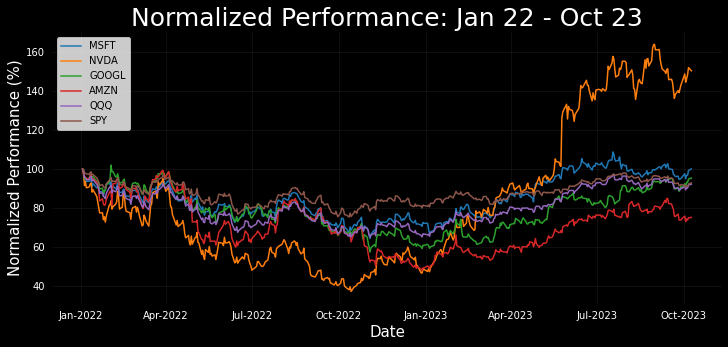

In [7]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

for stock in stock_list:
    ax.plot(normalized_prices.index, normalized_prices[stock], label=stock)

# Call helper function to format labels and ticks
format_labels_ticks(ax, y_label='Normalized Performance (%)')

# Format the date
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))  
    
ax.legend(loc='upper left')

# Call helper function to format plot style
format_plot_style(fig, ax)

# Show the plot
plt.title(label='Normalized Performance: Jan 22 - Oct 23', fontsize=25, color='white')
plt.show()

The peer group's returns were weak in 2022, with all of them ending the year lower. The NASDAQ 100 declined 33.2% while two members of the peer groups lost more than half their market values. Three of them - Nvidia (-51.4%), Amazon (-50.7%), Google (-39.1%) - underperformed the benchmark index, marking a painful year for the group.

However, from 2023 onwards, all of them saw an uptick in stock prices. Below, we will split the data by year to gain greater clarity on their year on year performance.

In [8]:
# Get normalized prices for 2022
normalized_prices_2022 = normalized_prices.loc[normalized_prices.index < '2023']

normalized_prices_2022.tail()

,MSFT,NVDA,GOOGL,AMZN,QQQ,SPY
Date,,,,,,
2022-12-23,71.984144,50.530256,61.541541,50.028023,67.050971,81.455716
2022-12-27,71.450440,46.924753,60.272498,48.731109,66.102993,81.134493
2022-12-28,70.717724,46.642288,59.327613,48.015165,65.230247,80.126164
2022-12-29,72.671639,48.526461,61.003574,49.400105,66.820254,81.568466
2022-12-30,72.312815,48.563012,60.851845,49.294474,66.780121,81.353613


In [9]:
# Get normalized prices for 2023
normalized_prices_2023 = pd.DataFrame()

for df, stock in zip(dataframes, stock_list):
    df_copy = df['2023-01-01':]['Adj Close'].copy()
    df_copy = df_copy / df_copy.iloc[0] * 100
    normalized_prices_2023[stock] = df_copy

normalized_prices_2023.tail()

,MSFT,NVDA,GOOGL,AMZN,QQQ,SPY
Date,,,,,,
2023-10-03,131.700634,304.104001,148.597384,145.327431,134.782340,111.934595
2023-10-04,134.041390,307.765793,151.750450,147.984153,136.616547,112.749700
2023-10-05,134.209485,312.287137,151.559698,146.772314,136.214009,112.707218
2023-10-06,137.529432,319.792419,154.376119,149.102773,138.496335,114.045369
2023-10-09,138.605259,316.375218,155.318665,149.452336,139.202672,114.775510


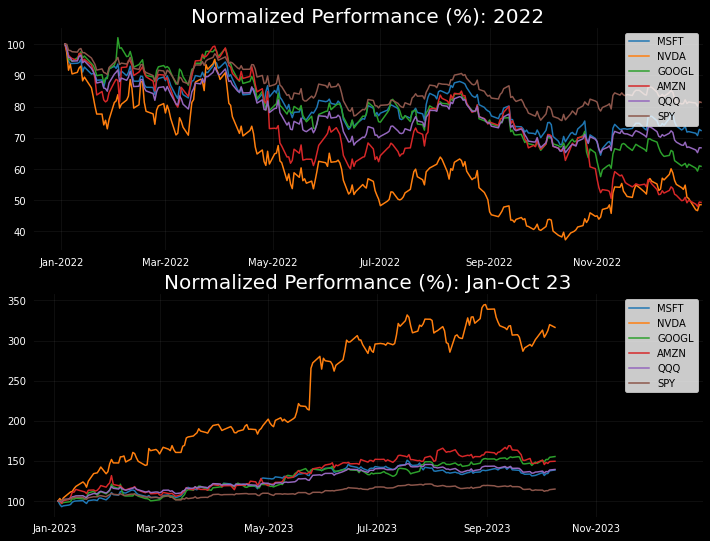

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 9))

# Plot data with labels
for stock in normalized_prices_2022.columns:
    ax1.plot(normalized_prices_2022.index, normalized_prices_2022[stock], label=stock)
    ax2.plot(normalized_prices_2023.index, normalized_prices_2023[stock], label=stock)

# Format labels limits
ax1.set_xlim(right=datetime(2022, 12, 31))
ax2.set_xlim(right=datetime(2023, 12, 31))

# Call helper function to format labels and ticks
format_labels_ticks([ax1, ax2], x_label='')

# Format the date
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

# Add legends
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

# Call helper function to format plot style
format_plot_style(fig, [ax1, ax2])

ax1.set_title('Normalized Performance (%): 2022', fontsize=20, color='white')
ax2.set_title('Normalized Performance (%): Jan-Oct 23', fontsize=20, color='white')

plt.show()

Although all of them registered positive returns in 2023, Nvidia was the top performer by far, registering a 316% gain in 2023 alone. Notwithstanding its weak performance in 2022, the stock gained 150% during the period from the start of 2022 to Oct 2023.

In the next section, we'll take a closer look into Nvidia and the drivers for it's outperformance.

## Stock Price & Volume: NVDA

In [11]:
NVDA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 444 entries, 2022-01-03 to 2023-10-09
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            444 non-null    float64
 1   High            444 non-null    float64
 2   Low             444 non-null    float64
 3   Close           444 non-null    float64
 4   Adj Close       444 non-null    float64
 5   Volume          444 non-null    int64  
 6   Daily Return %  443 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 43.9 KB


In [12]:
NVDA.describe()

,Open,High,Low,Close,Adj Close,Volume,Daily Return %
count,444.000000,444.000000,444.000000,444.000000,444.000000,4.440000e+02,443.000000
mean,250.945045,256.182747,245.763851,251.163086,251.042347,5.191767e+07,0.159436
std,107.821951,108.975980,106.153948,107.498022,107.529400,1.523844e+07,3.713423
min,109.709999,117.349998,108.129997,112.269997,112.201370,1.679340e+07,-9.470000
25%,165.167503,169.972496,161.720001,166.250004,166.095619,4.123088e+07,-2.105000
50%,225.110001,230.264999,217.785004,223.619995,223.435928,4.927235e+07,0.140000
75%,285.114990,288.634987,278.299988,283.977493,283.924713,5.859848e+07,2.155000
max,502.160004,502.660004,489.579987,493.549988,493.509338,1.543911e+08,24.370000


In [13]:
def plot_price_and_volume(df, stock_name, color='darkorange'):
    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(12, 5))

    # Plot the 'Adj Close' on the primary y-axis
    ax1.plot(df.index, df['Adj Close'], label='Adj Close', color=color)
    
    # Call helper function to format labels and ticks
    format_labels_ticks(ax1, y_label='Adj Close')
    ax1.set_ylabel('Adj Close', color=color, fontsize=15)
    ax1.tick_params(axis='y', labelcolor=color)

    # Format the date
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

    # Create a secondary y-axis for stock volume
    ax2 = ax1.twinx()

    # Plot the 'Volume' as a bar chart on the secondary y-axis in green with lower opacity
    ax2.bar(df.index, df['Volume'], label='Volume', color='white', alpha=0.8)
    ax2.set_ylabel('Volume (Billions)', color='white', fontsize=15)
    ax2.tick_params(axis='y', labelcolor='white')

    # Scale the y-axis limits according to each dataframe's std dev
    ax1.set_ylim(bottom=df['Adj Close'].min() - 0.5 * np.std(df['Adj Close']),
        top=df['Adj Close'].max() + 0.5 * np.std(df['Adj Close']))
    ax2.set_ylim(top=df['Volume'].max() * 4)

    # Call helper function to format plot style
    format_plot_style(fig, [ax1, ax2])

    # Add legend
    ax1.legend(loc='upper left')

    # Show the plot
    plt.title(label=f'{stock_name} Price & Volume', fontsize=25, color='white')
    plt.show()

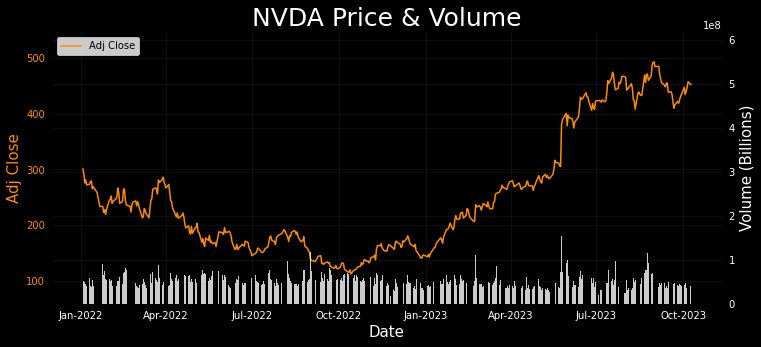

In [14]:
plot_price_and_volume(NVDA, 'NVDA')

After surpassing Wall Street's 1Q23 estimates in May, Nvidia's stock prices experienced a remarkable surge, soaring by over 24%, from \\$305 to $379 in a single day.

Nvidia found itself in a favorable position to capitalize on the global proliferation of generative AI. This was primarily due to its computer chips serving as the backbone for numerous prominent artificial intelligence applications worldwide, with ChatGPT being one of the most prominent examples.

Notwithstanding market volatility in 3Q23, the stock price has remained elevated, closing at $448 on 9 October 2023.

## Moving Averages: NVDA

In [15]:
averages = [50, 100, 200]
colors = ['cyan', 'yellow', 'magenta']
    
def moving_average(df):
    for avg in averages:
        label = str(avg) + " Day MA"
        df[label] = df['Adj Close'].shift(1).rolling(window=avg, center=False).mean().round(2)

for df in dataframes:
    moving_average(df)

In [16]:
moving_average(NVDA)
NVDA.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily Return %,50 Day MA,100 Day MA,200 Day MA
Date,,,,,,,,,,
2023-10-03,448.079987,451.299988,432.459991,435.170013,435.170013,47085000,-2.82,449.42,421.07,322.73
2023-10-04,437.420013,441.429993,432.920013,440.410004,440.410004,36182100,1.20,449.20,422.54,324.02
2023-10-05,440.500000,449.000000,438.880005,446.880005,446.880005,39348300,1.47,448.88,424.08,325.38
2023-10-06,441.929993,457.890015,440.260010,457.619995,457.619995,43339700,2.40,448.73,425.72,326.78
2023-10-09,448.420013,456.049988,443.679993,452.730011,452.730011,40967500,-1.07,448.70,427.40,328.26


In [17]:
def plot_price_and_ma(df, stock_name, color='darkorange', ma_days=averages):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 5))

    # Plot the 'Adj Close' on the primary y-axis
    ax.plot(df.index, df['Adj Close'], label='Adj Close', color=color)
    
    # Plot the moving averages
    for num_days, ma_color in zip(averages, colors):
        ax.plot(df.index, df[str(num_days) + ' Day MA'], label=str(num_days) + ' Day MA',
                color=ma_color, alpha=0.8)
    
    # Call helper function to format labels and ticks
    format_labels_ticks(ax, y_label='Adj Close')

    # Format the date
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

    # Scale the y-axis limits according to each dataframe's std dev
    ax.set_ylim(bottom=df['Adj Close'].min() - 0.5 * np.std(df['Adj Close']),
        top=df['Adj Close'].max() + 0.5 * np.std(df['Adj Close']))

    # Call helper function to format plot style
    format_plot_style(fig, ax)

    # Add legend
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='upper left')
    
    # Show the plot
    plt.title(label=f'{stock_name} Price & Moving Averages', fontsize=25, color='white')
    plt.show()

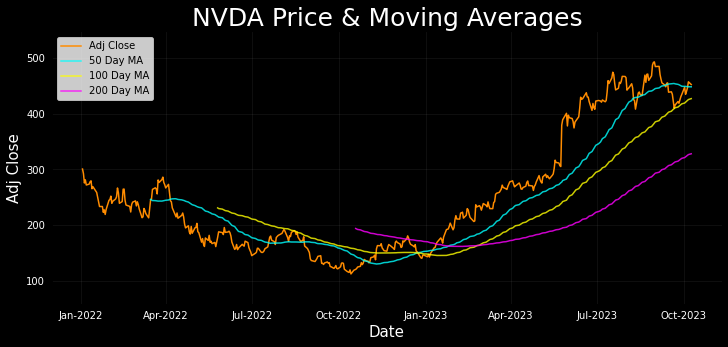

In [18]:
plot_price_and_ma(NVDA, 'NVDA')

Nvidia's stock price has displayed a robust uptrend since the beginning of 2023. During this period, it consistently remained above the 50-day moving average, with a brief decline that brought it in contact with this average only in late August.

Additionally, it didn't intersect with the 100-day moving average until late September, briefly touching it before bouncing off.

## Daily Returns: NVDA

In [19]:
def daily_return(df, stock_name):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 5))

    # Plot the 'Daily Return' on the primary y-axis
    ax.plot(df['Daily Return %'], color='white', linestyle=':', marker='o')

    # Call helper function to format labels and ticks
    format_labels_ticks(ax, y_label='Daily Return')

    # Format the date
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
    
    # Call helper function to format plot style
    format_plot_style(fig, ax)
    
    # Show the plot
    plt.title(label=f'{stock_name} Daily Return %', fontsize=25, color='white')
    plt.show()

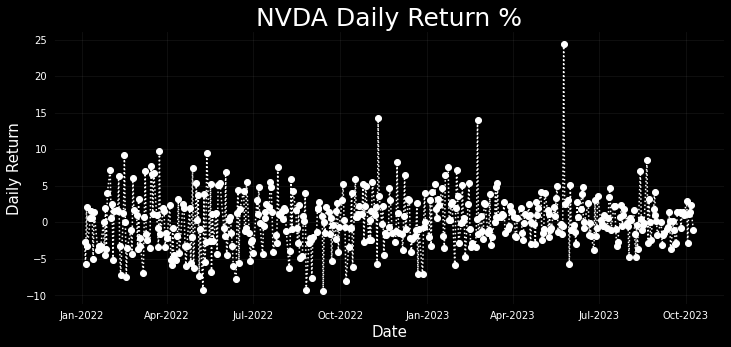

In [20]:
daily_return(NVDA, 'NVDA')

Nvidia's daily return distribution experienced two phases. From the start of 2022 till Feb 2023, volatility was higher and downside movements were more frequent. On the other hand, from Feb 2023 onwards, we see that overall volatility was lower and returns were more positive than negative.

In the next section, we'll break down the distribution of Nvdia's returns and compare the year on year changes.

## Daily Returns Distribution: NVDA

In [21]:
def daily_return_dist(df, stock_name):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the histogram and KDE with a red color line
    sns.distplot(df['Daily Return %'].dropna(),
                 color='white', bins=100, kde_kws=dict(linewidth=2, alpha=0.8),
                 hist_kws=dict(color="teal", linewidth=0, alpha=1))

    # Call helper function to format labels and ticks
    format_labels_ticks(ax, x_label='Return %', y_label='Frequency')

    # Call helper function to format plot style
    format_plot_style(fig, ax)
    
    plt.title(label=f'{stock_name} Daily Return % Distribution', fontsize=25, color='white')
    plt.show()

/Users/eugene/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


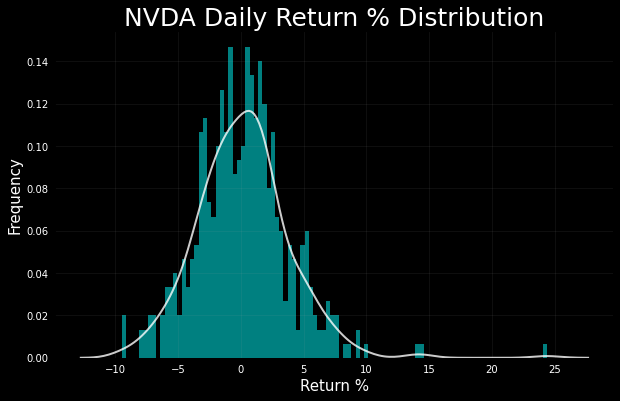

In [22]:
daily_return_dist(NVDA, 'NVDA')

The distribution of Nvidia's daily returns exhibits a clear positive skew. However, we know that most of this came from 2023 onwards. To get a better understanding on each year's contribution, we will create two dataframes, one for each year, to visualize their differences.

## Average Daily Returns & Volatility: NVDA

In [23]:
# Create dataframe for stocks' daily returns
return_dist = pd.DataFrame()
return_dist_2022 = pd.DataFrame()
return_dist_2023 = pd.DataFrame()

for df, stock in zip(dataframes, stock_list):
    df_copy = df['Daily Return %'].copy()  
    return_dist[stock] = df_copy
    return_dist_2022[stock] = df_copy[df_copy.index < datetime(2023,1,1)]
    return_dist_2023[stock] = df_copy[df_copy.index >= datetime(2023,1,1)]
    
# Create dataframes for NVDA's return distribution
return_dist_nvda = pd.DataFrame(return_dist['NVDA'])
return_dist_nvda_2022 = pd.DataFrame(return_dist_2022['NVDA'])
return_dist_nvda_2023 = pd.DataFrame(return_dist_2023['NVDA'])

for df in [return_dist_nvda, return_dist_nvda_2022, return_dist_nvda_2023]:
    df.rename(columns={'NVDA':'Daily Return %'},inplace=True)

In [24]:
nvda_mean_return = np.mean(return_dist_nvda['Daily Return %'])
nvda_std = np.std(return_dist_nvda['Daily Return %'])

nvda_mean_return_2022 = np.mean(return_dist_nvda_2022['Daily Return %'])
nvda_std_2022 = np.std(return_dist_nvda_2022['Daily Return %'])

nvda_mean_return_2023 = np.mean(return_dist_nvda_2023['Daily Return %'])
nvda_std_2023 = np.std(return_dist_nvda_2023['Daily Return %'])

print(f'NVDA overall mean returns: {round(nvda_mean_return,2)}%')
print(f'NVDA overall return std dev: {round(nvda_std,2)}%')
print()
print(f'NVDA 2022 mean return: {round(nvda_mean_return_2022,2)}%')
print(f'NVDA 2022 return std dev: {round(nvda_std_2022,2)}%')
print()
print(f'NVDA 2023 mean return: {round(nvda_mean_return_2023,2)}%')
print(f'NVDA 2023 return std dev: {round(nvda_std_2023,2)}%')

NVDA overall mean returns: 0.16%
NVDA overall return std dev: 3.71%

NVDA 2022 mean return: -0.21%
NVDA 2022 return std dev: 3.98%

NVDA 2023 mean return: 0.64%
NVDA 2023 return std dev: 3.27%


During the period from the start of 2022 to Oct 2023, Nvidia's average return was 0.16% while its return standard deviation was 3.71%.

Year on year, mean daily returns swung from -0.21% in 2022 to positive 0.64% in 2023 while standard deviation decreased from 3.71% in 2022 to 3.27% in 2023.

Besides standard deviation, there is another metric that tracks downside risk - semi-deviation. Standard deviation takes into account all the returns for the year. Semi-deviation does the same, but with an additional conditon: it only captures the standard deviation of returns which fall below the mean return. Here is the formula:

$\sigma_{semi}$ = $\sqrt{\frac{1}{N} \sum\limits_{x_{t} \leq x̄}(x - x̄)^2} $

Not all volatility is equal. We are naturally more concerned with downside volatility than upside volatilty. With this metric, we can see how this stock behaves when the market is weaker and therefore have clearer expectations in similar environments in the future.

In [25]:
nvda_semidev = np.std(return_dist_nvda[return_dist_nvda['Daily Return %'] <= nvda_mean_return]['Daily Return %'])
nvda_upside_vol = np.std(return_dist_nvda[return_dist_nvda['Daily Return %'] > nvda_mean_return]['Daily Return %'])

nvda_semidev_2022 = np.std(return_dist_nvda_2022[return_dist_nvda_2022['Daily Return %'] <= nvda_mean_return_2022]['Daily Return %'])
nvda_upside_vol_2022 = np.std(return_dist_nvda_2022[return_dist_nvda_2022['Daily Return %'] > nvda_mean_return_2022]['Daily Return %'])

nvda_semidev_2023 = np.std(return_dist_nvda_2023[return_dist_nvda_2023['Daily Return %'] <= nvda_mean_return_2023]['Daily Return %'])
nvda_upside_vol_2023 = np.std(return_dist_nvda_2023[return_dist_nvda_2023['Daily Return %'] > nvda_mean_return_2023]['Daily Return %'])

print(f'NVDA overall semi-deviation: {round(nvda_semidev,2)}%')
print(f'NVDA upside volatility: {round(nvda_upside_vol,2)}%')
print()
print(f'NVDA 2022 semi-deviation: {round(nvda_semidev_2022,2)}%')
print(f'NVDA 2022 upside volatility: {round(nvda_upside_vol_2022,2)}%')
print()
print(f'NVDA 2023 semi-deviation: {round(nvda_semidev_2023,2)}%')
print(f'NVDA 2023 upside volatility: {round(nvda_upside_vol_2023,2)}%')

NVDA overall semi-deviation: 2.08%
NVDA upside volatility: 2.77%

NVDA 2022 semi-deviation: 2.17%
NVDA 2022 upside volatility: 2.55%

NVDA 2023 semi-deviation: 1.47%
NVDA 2023 upside volatility: 3.11%


In 2022, Nvidia exhibited a semi-deviation of 2.17%, whereas in 2023, it reduced to just 1.47%. This observation aligns with our earlier analysis of the daily returns chart, where we noticed higher volatility and more frequent downward movements in 2022.

In [26]:
trading_days_2022 = len(return_dist_nvda_2022)
trading_days_2022_up = len(return_dist_nvda_2022[return_dist_nvda_2022['Daily Return %'] > nvda_mean_return_2022]['Daily Return %'])

trading_days_2023 = len(return_dist_nvda_2023)
trading_days_2023_up = len(return_dist_nvda_2023[return_dist_nvda_2023['Daily Return %'] > nvda_mean_return_2023]['Daily Return %'])

print(f"No. of trading days in 2022: {trading_days_2022}")
print(f"No. of trading days outperforming 2022's avg return: {trading_days_2022_up}")
print(f"% of trading days outperforming 2022's avg return: {round(trading_days_2022_up/trading_days_2022*100,2)}%")
print()
print(f"No. of trading days in 2023: {trading_days_2023}")
print(f"No. of trading days outperforming 2023's avg return: {trading_days_2023_up}")
print(f"% of trading days outperforming 2023's avg return: {round(trading_days_2023_up/trading_days_2023*100,2)}%")

No. of trading days in 2022: 251
No. of trading days outperforming 2022's avg return: 125
% of trading days outperforming 2022's avg return: 49.8%

No. of trading days in 2023: 193
No. of trading days outperforming 2023's avg return: 88
% of trading days outperforming 2023's avg return: 45.6%


To satisfy our curiosity, we also computed the measure of upside volatility. As previously mentioned, the return standard deviation for 2023 stood at 3.27%. However, when the stock's returns surpassed the annual average, the volatility was notably higher - more than double compared to periods when returns were below the average.

This finding is intriguing because in 2022, nearly half of the trading days (49.8%) experienced stock returns above the annual average of -0.21%. In contrast, for the period from Jan to Oct 2023, only 45.6% of the trading days so far have exceeded the annual average of 0.64%.

Surprisingly, despite fewer days above the average in 2023, when it did occur, the stock exhibited higher volatility. This highlights that the majority of the volatility in 2023 can be classified as 'good' volatility, even though it may appear relatively high.

## Skewness & Kurtosis of Daily Returns: NVDA

Skewness is a statistical measure that evaluates the asymmetry of a probability distribution. It provides insight into how much the data is shifted towards one side. Positive skewness points to a longer tail on the right side of the distribution, while negative skewness suggests a longer tail on the left side.

On the other hand, kurtosis is a statistical measure that quantifies the shape of a probability distribution. It furnishes information about the tails and the degree of peakedness compared to a normal distribution. Positive kurtosis indicates heavier tails and a distribution with a more pronounced peak, whereas negative kurtosis implies lighter tails and a flatter distribution.

Having already examined the distribution of Nvidia's returns, the notable shift in 2023 compared to the previous year prompts us to visualize and compare these returns for a more comprehensive understanding.

In [27]:
def daily_return_dist_comp(df, stock_name):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Define a color palette for different years (you can customize the colors)
    years = return_dist_nvda.index.year.unique()
    palette = sns.color_palette("husl", n_colors=len(years))

    # Loop through each unique year and plot the distribution
    for year in years:
        sns.kdeplot(data = df[df.index.year == year]['Daily Return %'],
                    label=str(year), color=palette[year - 2022], fill=True, alpha=0.5)

    # Call helper function to format labels and ticks
    format_labels_ticks(ax, x_label='Return %',y_label='Frequency')

    # Call helper function to format plot style
    format_plot_style(fig, ax)

    ax.legend(title='Year', loc='upper right')
    plt.title(label=f'{stock_name} Daily Returns Distribution: 2022 vs 2023', fontsize=25, color='white')

    # Show the plot
    plt.show()

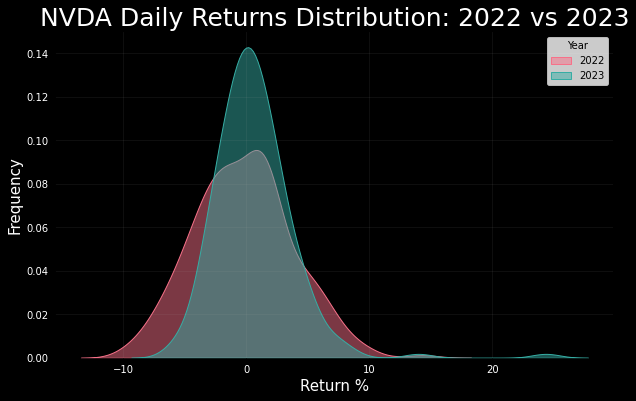

In [28]:
daily_return_dist_comp(return_dist_nvda, 'NVDA')

In [29]:
print(f"NVDA overall skewness: {round(return_dist_nvda['Daily Return %'].skew(),1)}")
print(f"NVDA overall kurtosis: {round(return_dist_nvda['Daily Return %'].kurtosis(),1)}")
print()
print(f"NVDA 2022 skewness: {round(return_dist_nvda_2022['Daily Return %'].skew(),1)}")
print(f"NVDA 2022 kurtosis: {round(return_dist_nvda_2022['Daily Return %'].kurtosis(),1)}")
print()
print(f"NVDA 2023 skewness: {round(return_dist_nvda_2023['Daily Return %'].skew(),1)}")
print(f"NVDA 2023 kurtosis: {round(return_dist_nvda_2023['Daily Return %'].kurtosis(),1)}")

NVDA overall skewness: 0.8
NVDA overall kurtosis: 4.3

NVDA 2022 skewness: 0.3
NVDA 2022 kurtosis: 0.1

NVDA 2023 skewness: 2.4
NVDA 2023 kurtosis: 14.6


From the beginning of 2022 to Oct 2023, Nvidia's daily stock returns had a positive skew of 0.8. 

Looking at each year's respective distribution profile, 2022's had a skew of only 0.3. This algins with its platykurtic distribution where most data points are clustered near the mean.

In contrast, returns in 2023 exhibited a distinctly positive skew of 2.4. Furthermore, the returns distribtions in 2023 was leptokurtic, with a longer tails as seen above. This supports what we've observed earlier where the average return in 2023 was considerably higher than in 2022.

## Peer Group Correlation

Next, we'll now examine the relationship between each stock's performance against the rest of the group.

We'll start off with a visualization of the relative performance between two main indexes, SPY and QQQ.

/Users/eugene/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


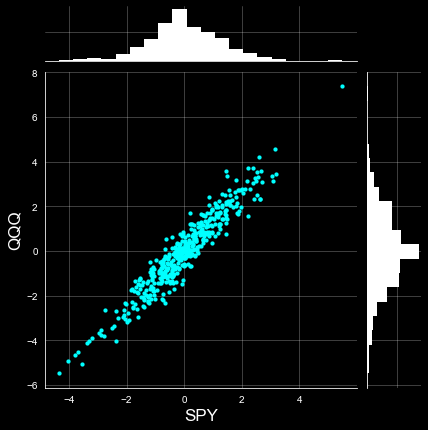

In [30]:
# Create the joint plot with light green color for points
sns.set_style("darkgrid")
jointplot = sns.jointplot('SPY', 'QQQ', return_dist, kind='scatter', 
                          color='cyan', linewidth=0, s=18,
                          marginal_kws=dict(bins=20, linewidth=0, color='white', alpha=1))

# Set the background color of the plot and the axes to black
for jplot in [jointplot.fig, jointplot.ax_joint, jointplot.ax_marg_x, jointplot.ax_marg_y]:
    jplot.set_facecolor("black")

# Set the color of axis labels and ticks to white
for jplot_label in [jointplot.ax_joint.xaxis.label, jointplot.ax_joint.yaxis.label]:
    jplot_label.set_color("white")
    jplot_label.set_fontsize(17)
    
for axis in ['x', 'y']:
    jointplot.ax_joint.tick_params(axis=axis, colors='white')

# Make gridlines fainter by reducing alpha
for jplot_ax in [jointplot.ax_joint, jointplot.ax_marg_x, jointplot.ax_marg_y]:
    jplot_ax.grid(alpha=0.3)

# Show the plot
plt.show()

Although the SPY and QQQ are benchmark indexes that represent the US market, they have slightly different focuses. They exhibit a strong correlation in their performance, but there are noticeable distinctions between them.

The SPY predominantly reflects the overall market, encompassing various sectors, while the QQQ is significantly skewed toward the technology sector. As a result, the QQQ index experiences wider fluctuations in its scale to account for the heightened volatility of tech companies.

Hence, they tend to have more substantial gains and losses compared to the broader market.

/Users/eugene/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


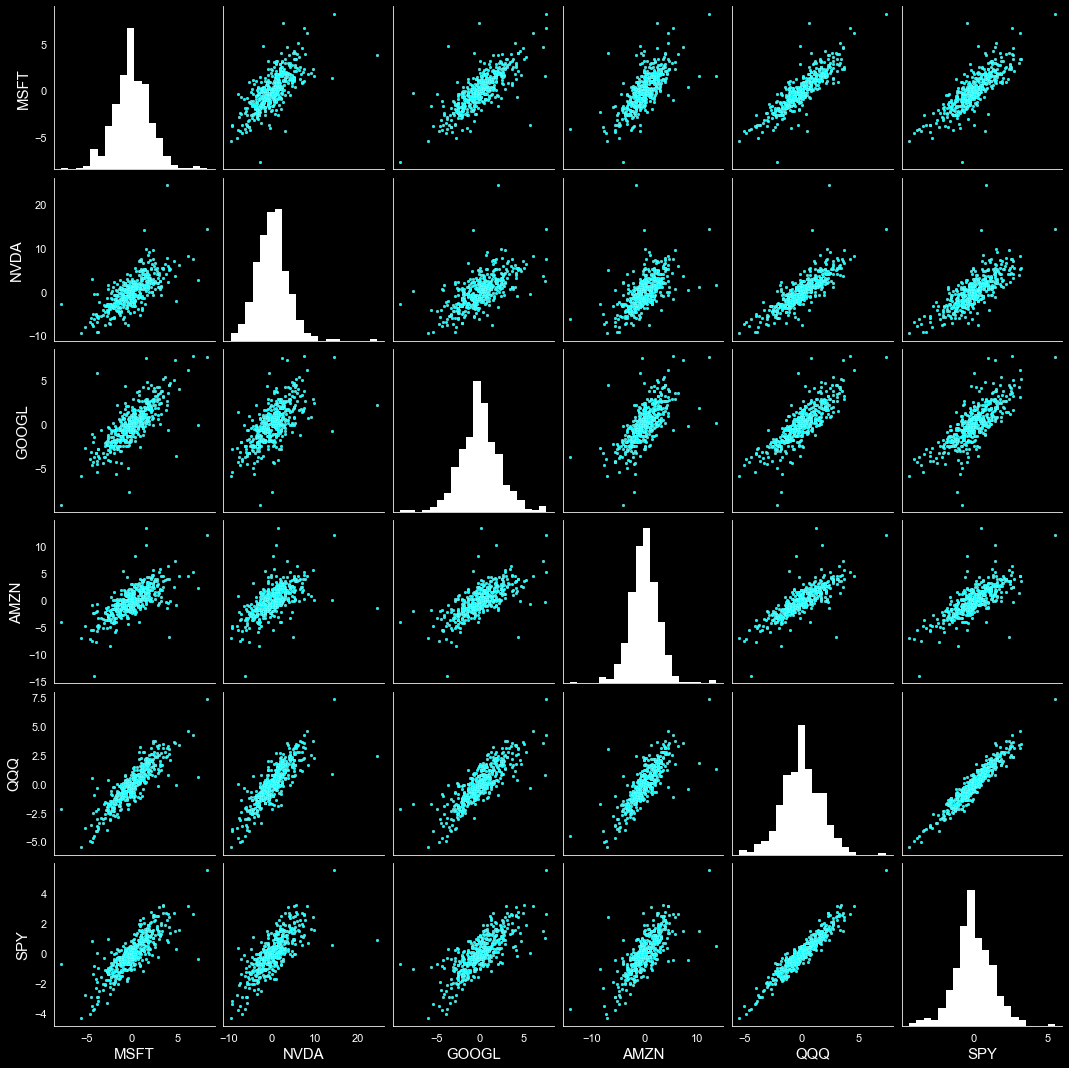

In [31]:
# Set the style and palette to dark
sns.set_style("dark")

pairplot = sns.pairplot(return_dist.dropna(), kind='scatter', 
                        diag_kws={'color':'white', 'bins':20, 'linewidth':0, 'alpha':1},
                        plot_kws={'color':'cyan', 'linewidth':0.2, 's':8})

# Set the background color of the figure and axis
pairplot.fig.set_facecolor("black")

for ax in pairplot.axes.flat:
    ax.set_facecolor("black") 
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(labelsize=11, colors='white', which='both')
    ax.set_xlabel(ax.get_xlabel(), fontsize=15, color='white')
    ax.set_ylabel(ax.get_ylabel(), fontsize=15, color='white')

plt.show()

For the individual tech companies above, we observe outliers in each of their pairplots. This is because tech companies have greater idiosyncratic (company-specific) risk which can lead to sudden swings in stock prices.

In [32]:
return_dist.corr()

,MSFT,NVDA,GOOGL,AMZN,QQQ,SPY
MSFT,1.000000,0.712310,0.763932,0.705520,0.870472,0.816661
NVDA,0.712310,1.000000,0.643146,0.599207,0.831842,0.755120
GOOGL,0.763932,0.643146,1.000000,0.687212,0.832776,0.773419
AMZN,0.705520,0.599207,0.687212,1.000000,0.806157,0.749698
QQQ,0.870472,0.831842,0.832776,0.806157,1.000000,0.956174
SPY,0.816661,0.755120,0.773419,0.749698,0.956174,1.000000


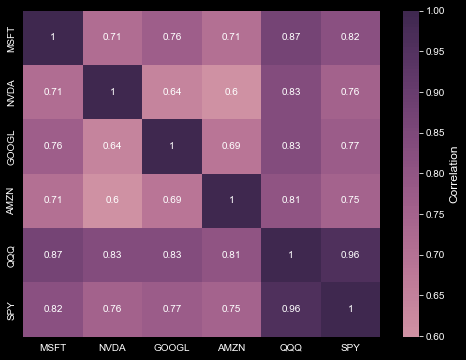

In [33]:
# Set the color palette
cmap = sns.cubehelix_palette(n_colors= 100,dark =.2, light=0.65)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap with a black background
heatmap = sns.heatmap(return_dist.corr(), annot=True, cmap=cmap, annot_kws={"color": "white"})

# Set the background color of the figure and axis to black
fig.patch.set_facecolor("black")
ax.set_facecolor("black")

# Set tick colors to white
heatmap.tick_params(colors="white")

# Set label colors to white
ax.set_xticklabels(ax.get_xticklabels(), color="white")
ax.set_yticklabels(ax.get_yticklabels(), color="white")

# Customize color bar
cbar = heatmap.collections[0].colorbar
cbar.set_label("Correlation", color="white", size=12)
cbar.ax.yaxis.set_tick_params(colors="white")

plt.show()

Broadly, all four stocks are positively correlated with each other. Since they belong to the tech sector, it would be expected that they also have a strong positive correlation with the QQQ.

However, it's noteworthy that each of these stocks displays a stronger positive correlation with the SPY than they do with each other, despite the fact that they all operate within the same sector.

# Risk-Return Comparison

In [34]:
mean_returns = return_dist.mean()
std_devs = return_dist.std()
risk_return_ratios = mean_returns/std_devs
print(risk_return_ratios.sort_values(ascending=False))

NVDA     0.042935
MSFT     0.009993
GOOGL    0.006475
QQQ     -0.001883
SPY     -0.006414
AMZN    -0.009241
dtype: float64


/Users/eugene/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


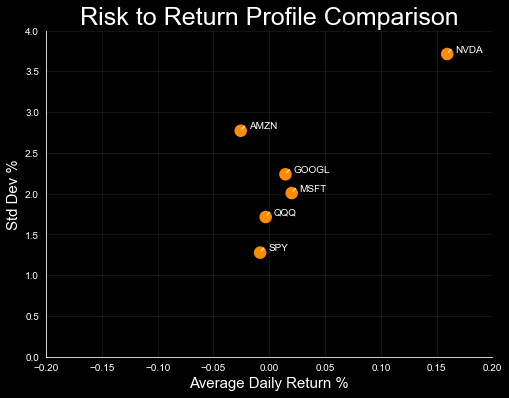

In [35]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Scatterplot of expected return of the stocks vs. their standard deviations of daily returns
area = np.pi * 50
sns.scatterplot(mean_returns, std_devs, alpha=1, s=area, color='darkorange', edgecolor='none')

plt.ylim(0, 4)
plt.xlim(-0.2, 0.2)

plt.xlabel('Average Daily Return %')
plt.ylabel('Std Dev %')

# Set tick colors and labels to white
ax.tick_params(colors="white", labelcolor="white")

ax.set_xlabel(ax.get_xlabel(), fontsize=15, color='white')
ax.set_ylabel(ax.get_ylabel(), fontsize=15, color='white')

# Call helper function to format plot style
format_plot_style(fig, ax)

# Annotate points with stock labels
for label, x, y in zip(return_dist.columns, mean_returns, std_devs):
    annotation = plt.annotate(
        label, 
        xy=(x, y), xytext=(8,0),
        textcoords='offset points', ha='left', va='bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.5'))
    
    annotation.set_color('white')  
    
plt.title(label='Risk to Return Profile Comparison', fontsize=25, color='white')
plt.show()

Lastly, we plot the risk/return profiles of the stocks.

Nvdia's return per unit of risk was the highest as it was boosted by its 2023 performance. On the other hand Amazon, had the lowest return per unit of risk. Despite being more volatile, its returns lagged both benchmark returns.

Unsurprisingly, the benchmarks had the lowest volatility compared to the individual companies.

# Conclusion

This project examined the evolving landscape shaped by natural language processing and artificial intelligence, focusing on tech giants like Nvidia, Google, Microsoft, and Amazon. Our analysis spanned stock price trends, moving averages, daily returns, and risk assessments.

While 2022 posed challenges with declining stock prices, 2023 marked a strong recovery, notably led by Nvidia, benefitting from its role in generative AI, notably ChatGPT.

Technical analysis showcased Nvidia's sustained uptrend in 2023, staying consistently above the 50-day moving average. Daily return distributions highlighted increased volatility and positive skewness.

We explored risk metrics such as standard deviation, semi-deviation, and upside volatility, providing insights into Nvidia's evolving risk profile. Skewness and kurtosis illuminated shifts in return distributions, especially in 2023.

Our analysis demonstrated the unique dynamics of the technology sector, positive correlations with the broader market, and Nvidia's exceptional return per unit of risk. In summary, this study offers valuable insights into tech giants' performance and risk profiles in the AI-driven era.